# Check the results from randomized search

Using Python 3.7 and fast.ai v2

Author: Patrick Ruoff

Date: January 2020

In [1]:
import numpy as np

import data_preparation_methods as prep
import analysis_methods as ana

In [2]:
opt_methods = [
    'RF-Clf_opt', 
    'LR_opt',
    'GaussianNB_opt', 
    'kNN_opt',
    'SVM_opt',
    'GradientBDT_opt'
]
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [5, 7.5]
plt.rcParams['axes.titlesize'] = 'xx-large'
n_folds = 5

In [3]:
figs = {}
def plot_users_randomized_search_boxplot(occupant, path_of_searches, iter_count):
    """ Plot 
    
    :param occupant: occupant ID
    :param path_of_searches: path where ranomdized_search pickles are stored
    :param iter_count: iteration count of randomized_searches
    :return: dataframe of 
    """
    data = prep.import_data(occupant)
    target = '{}_is_heating'.format(occupant)
    cat_names = ['o_condition']
    cont_names = data.columns.drop(cat_names).to_numpy()
    naive_acc, naive_f1, pos_label, Y_df, X_df = prep.prepare_data(
        data, target)
    df, method_plot_names = ana.prepare_plot_of_search_results(
            opt_methods, occupant, path_of_searches, iter_count)
    figs[occupant] = df.boxplot()
    # figs[occupant].set_title('F1-Score Boxplot for {}\'s randomized Grid Search on {}
    # datapoints'.format(user, len(Y_df)))
    figs[occupant].axhline(y=naive_f1, xmin=0.015, xmax=0.985, color='black')
    figs[occupant].set_xlabel('Method')
    figs[occupant].set_ylabel('Average F1-Score')
    plt.savefig('plots/{}_randomized_search_boxplot.png'.format(occupant), dpi=300)
    return df

The target variable distribution is:
 0.0    0.972659
1.0    0.027341
Name: U1_is_heating, dtype: float64
X shape: (3621, 165)
The ordered f1-scores are:  [(b'kNN_opt', 0.98603493) (b'SVM_opt', 0.98603493)
 (b'GradientBDT_opt', 0.98603493) (b'GaussianNB_opt', 0.98534316)
 (b'RF-Clf_opt', 0.97464067) (b'LR_opt', 0.97460311)]


,kNN,SVM,GBDT,GNB,RF,LR
0,0.986035,0.969560,0.973741,0.985343,0.973760,0.774389
1,0.986035,0.983245,0.974201,0.985343,0.971231,0.973880
2,0.986035,0.969958,0.974641,0.985343,0.973907,0.819623
3,0.972429,0.986035,0.974641,0.985343,0.971081,0.970842
4,0.974641,0.975830,0.974054,0.985343,0.972427,0.974028
...,...,...,...,...,...,...
195,0.986035,0.969560,0.986035,0.985343,0.969416,0.850212
196,0.986035,0.969560,0.979302,0.985343,0.971231,0.778467
197,0.972579,0.981969,0.976027,0.985343,0.974201,0.827081
198,0.973026,0.969560,0.972024,0.985343,0.971081,0.827406


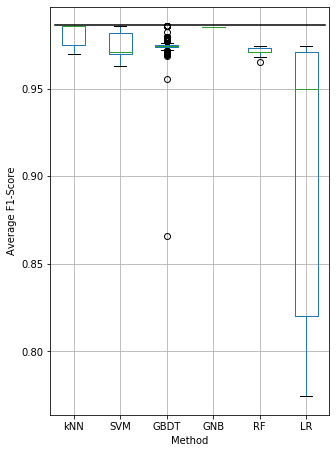

In [4]:
plot_users_randomized_search_boxplot('U1', './search_results', 200)

Interestingly, kNN, SVM, and GBDT all have a maximum f1-score of 0.98603493.

The target variable distribution is:
 0.0    0.79562
1.0    0.20438
Name: U2_is_heating, dtype: float64
X shape: (2466, 159)
The ordered f1-scores are:  [(b'kNN_opt', 0.98405248) (b'GradientBDT_opt', 0.9753184 )
 (b'SVM_opt', 0.97460671) (b'RF-Clf_opt', 0.96429944)
 (b'GaussianNB_opt', 0.95568742) (b'LR_opt', 0.95532252)]


,kNN,GBDT,SVM,RF,GNB,LR
0,0.961459,0.964299,0.939647,0.964299,0.955687,0.823968
1,0.982929,0.964299,0.862459,0.954357,0.955687,0.806159
2,0.982929,0.964299,0.939647,0.954357,0.955687,0.831230
3,0.976594,0.964299,0.939647,0.954357,0.955687,0.832747
4,0.959988,0.964299,0.939647,0.954357,0.955687,0.843016
...,...,...,...,...,...,...
195,0.965690,0.964299,0.885604,0.964299,0.955687,0.826062
196,0.965966,0.964299,0.939647,0.964299,0.955687,NaN
197,0.959988,0.885604,0.847371,0.964299,0.955687,0.829634
198,0.961459,0.964299,0.939647,0.964299,0.955687,0.829883


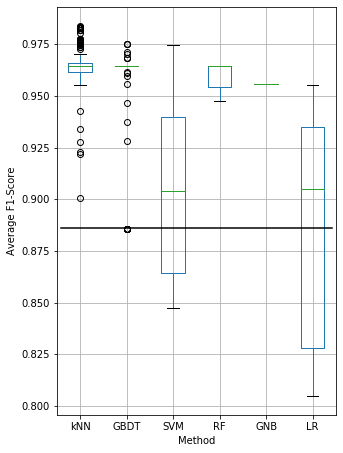

In [5]:
opt_methods = [
    'RF-Clf_opt', 
    'GradientBDT_opt',
    'SVM_opt',
    'GaussianNB_opt', 
    'kNN_opt',
    'LR_opt',
]
plot_users_randomized_search_boxplot('U2', './search_results', 200)

The target variable distribution is:
 0.0    0.644036
1.0    0.355964
Name: U3_is_heating, dtype: float64
X shape: (20606, 166)
The ordered f1-scores are:  [(b'RF-Clf_opt', 0.95791953) (b'GradientBDT_opt', 0.95660187)
 (b'SVM_opt', 0.94146146) (b'kNN_opt', 0.93106437) (b'LR_opt', 0.85286904)]


,RF,GBDT,SVM,kNN,LR
0,0.955095,0.916828,0.705521,0.918159,0.806226
1,0.944092,0.939198,0.667044,0.925639,0.807170
2,0.948091,0.949022,0.657538,0.925506,0.805137
3,0.952704,0.948794,0.691128,0.888222,0.807639
4,0.949781,0.945476,0.730006,0.884880,0.806360
...,...,...,...,...,...
195,0.946411,0.932252,0.785602,0.925196,0.806889
196,0.955341,0.948645,0.640661,0.920795,NaN
197,0.956572,0.805964,0.646215,0.887943,0.807514
198,0.955372,0.941839,0.699403,0.919928,0.807099


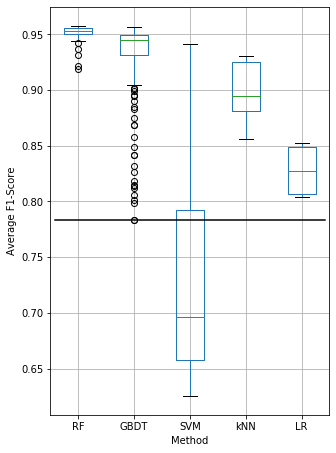

In [6]:
# not GNB for O3 because of results of pre_selection
opt_methods = [
    'RF-Clf_opt', 
    'GradientBDT_opt',
    'LR_opt',
    'kNN_opt',
    'SVM_opt'
]
plot_users_randomized_search_boxplot('U3', './search_results', 200)

For both U1 and U2 kNN was the best model and RF for U3

Seeing which methdos performed best after parameter optimization,
I ran refit_with_optimized_parameters.ipynb to refit all the models with 
the optimal parameters with three different seeds as is good practice. There, I also checked the SHAP-explainers 
execution times for these models to see if they are fit for deployment in LATEST.